In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scrnatools as rna
import numpy as np
import pandas as pd

In [2]:
# Setup figure params
sc.set_figure_params(figsize=(4,4),  dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False

In [3]:
processedDataPath = "/mnt/iacchus/joe/processed_data/"

In [4]:
adata = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/combined_all_genes_TECs.h5ad")
tau_score = pd.read_csv("../../analysis/tau_scores.csv", index_col=0)
tau_score = tau_score[tau_score.index.isin(adata.var_names)]
entropy_score = pd.read_csv("../../analysis/entropy/cell_x_gene_atlas_cell_type_entropy.csv", index_col=0)
entropy_score = entropy_score[entropy_score.index.isin(adata.var_names)]

# Num TRAs expressed

## Tau

In [5]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[tau_score[tau_score.TRA].index]
exprs = exprs > 0.1
adata.obs["num_TRAs_expressed_tau"] = exprs.sum(axis=1)

## Entropy

In [6]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[entropy_score[entropy_score.TRA].index]
exprs = exprs > 0.1
adata.obs["num_TRAs_expressed_entropy"] = exprs.sum(axis=1)

## plots

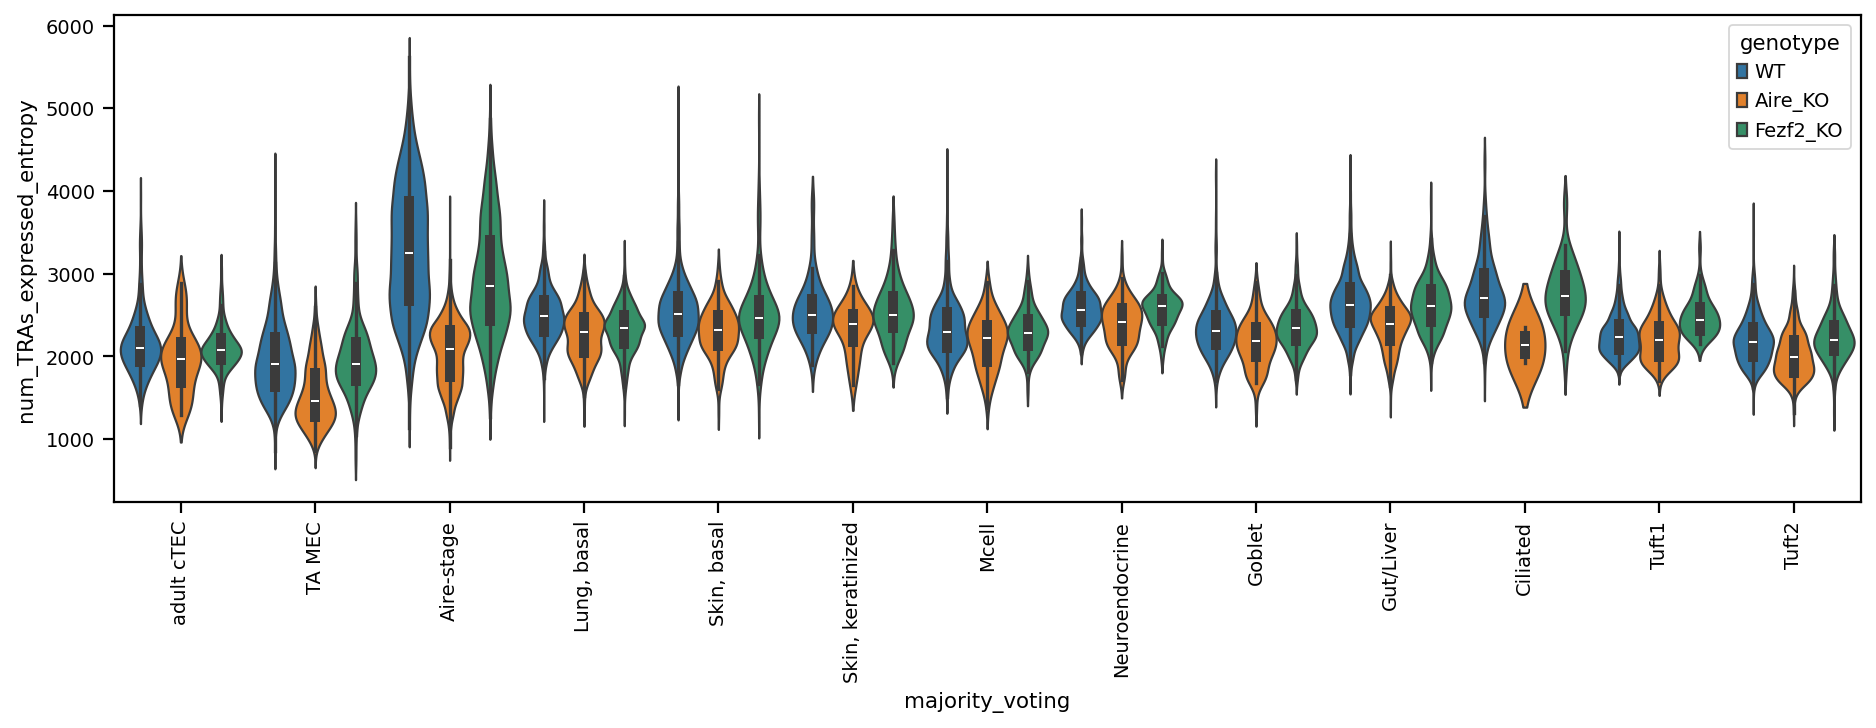

In [7]:
plt.figure(figsize=(14,4))
sns.violinplot(
    adata.obs,
    x="majority_voting",
    y="num_TRAs_expressed_entropy",
    hue="genotype",
    hue_order=["WT", "Aire_KO", "Fezf2_KO"],
    density_norm="width",
    width=0.9,
    order=["adult cTEC", "TA MEC", "Aire-stage", "Lung, basal",
           "Skin, basal", "Skin, keratinized", "Mcell", "Neuroendocrine", "Goblet",
           "Gut/Liver", "Ciliated", "Tuft1", "Tuft2"]
)
plt.xticks(rotation=90)
plt.show()

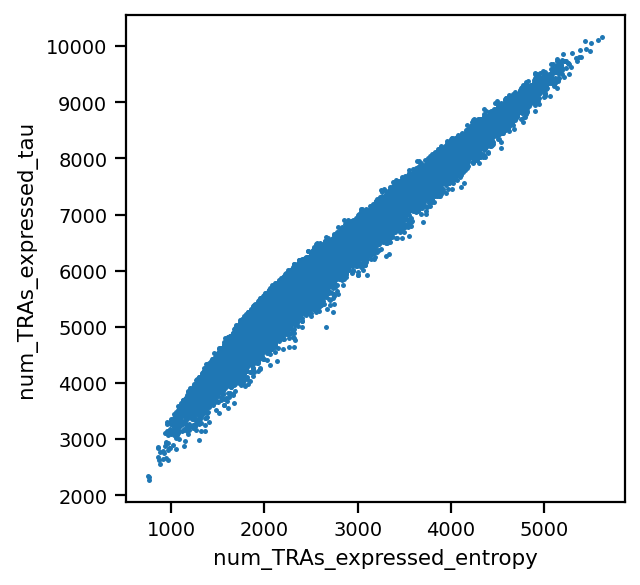

In [8]:
sns.scatterplot(
    adata.obs,
    x="num_TRAs_expressed_entropy",
    y="num_TRAs_expressed_tau",
    s=5,
    linewidth=0,
)
plt.show()

# Num nonTRAs expressed

## Tau

In [9]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[tau_score[~tau_score.TRA].index]
exprs = exprs > 0.1
adata.obs["num_nonTRAs_expressed_tau"] = exprs.sum(axis=1)

## Entropy

In [10]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[entropy_score[~entropy_score.TRA].index]
exprs = exprs > 0.1
adata.obs["num_nonTRAs_expressed_entropy"] = exprs.sum(axis=1)

## plots

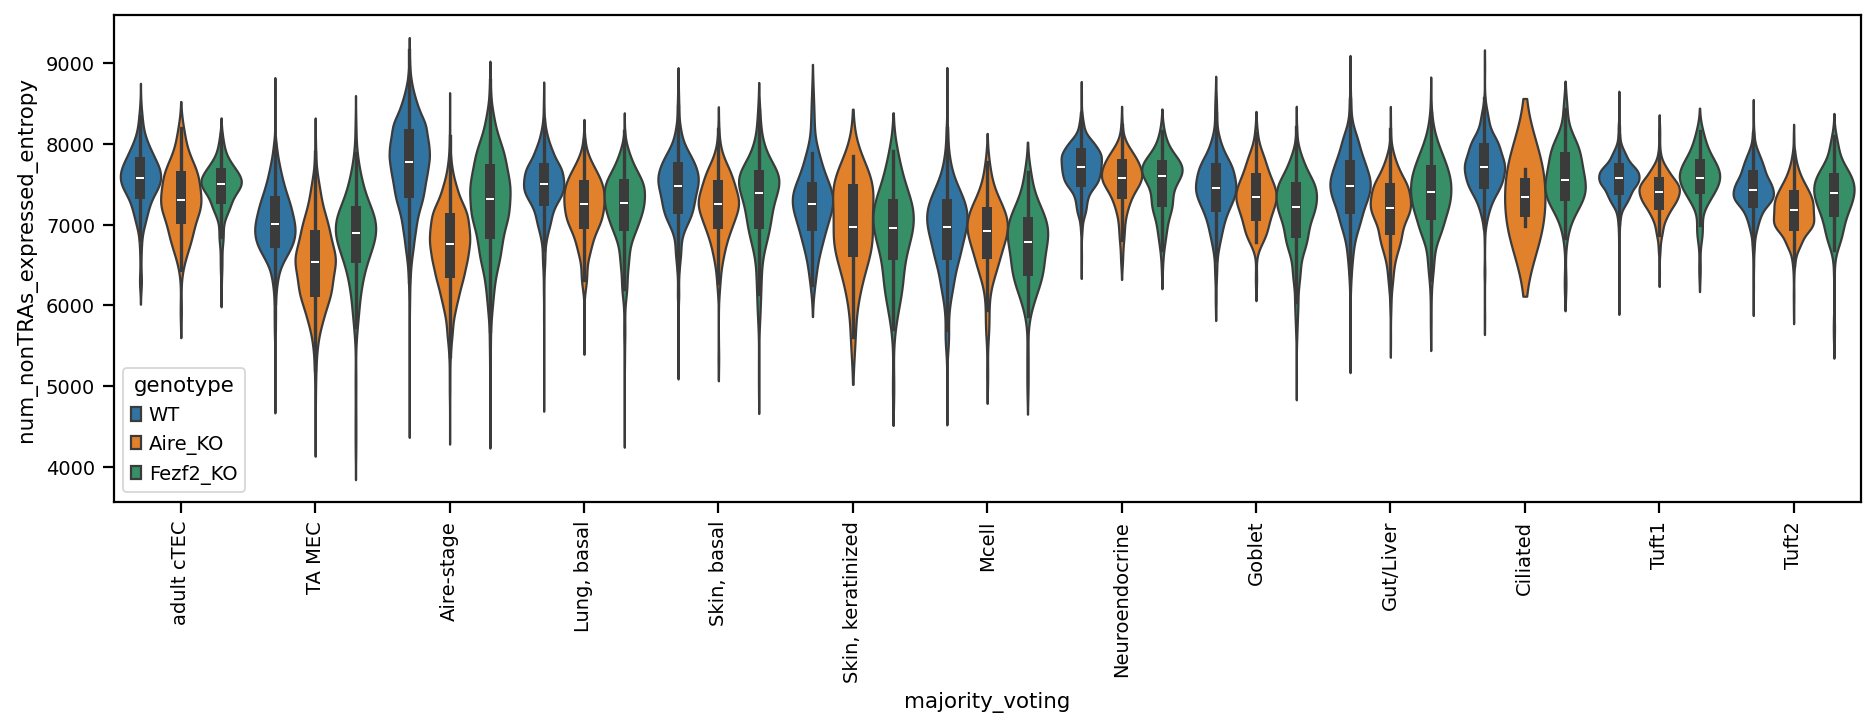

In [11]:
plt.figure(figsize=(14,4))
sns.violinplot(
    adata.obs,
    x="majority_voting",
    y="num_nonTRAs_expressed_entropy",
    hue="genotype",
    hue_order=["WT", "Aire_KO", "Fezf2_KO"],
    density_norm="width",
    width=0.9,
    order=["adult cTEC", "TA MEC", "Aire-stage", "Lung, basal",
           "Skin, basal", "Skin, keratinized", "Mcell", "Neuroendocrine", "Goblet",
           "Gut/Liver", "Ciliated", "Tuft1", "Tuft2"]
)
plt.xticks(rotation=90)
plt.show()

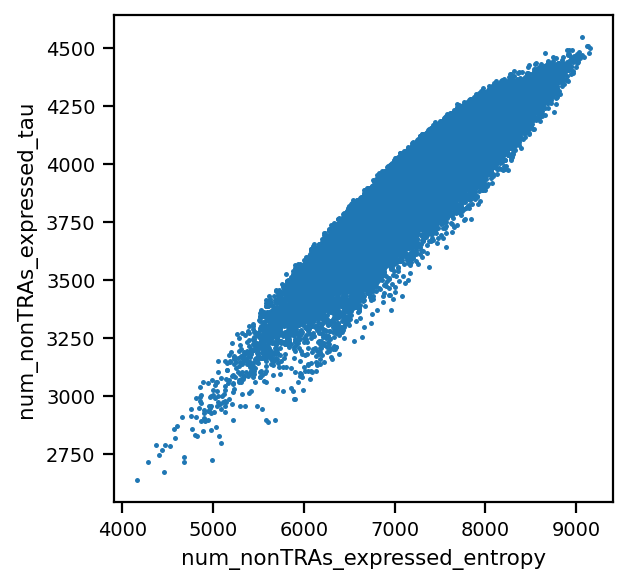

In [12]:
sns.scatterplot(
    adata.obs,
    x="num_nonTRAs_expressed_entropy",
    y="num_nonTRAs_expressed_tau",
    s=5,
    linewidth=0,
)
plt.show()

# TRA enrichment score

## Tau

In [13]:
sc.tl.score_genes(
    adata,
    gene_list=entropy_score[entropy_score.TRA].index,
    score_name="tau_enrichment_score",
    use_raw=True,
)

## entropy

In [14]:
sc.tl.score_genes(
    adata,
    gene_list=entropy_score[entropy_score.TRA].index,
    score_name="entropy_enrichment_score",
    use_raw=True,
)

## plots

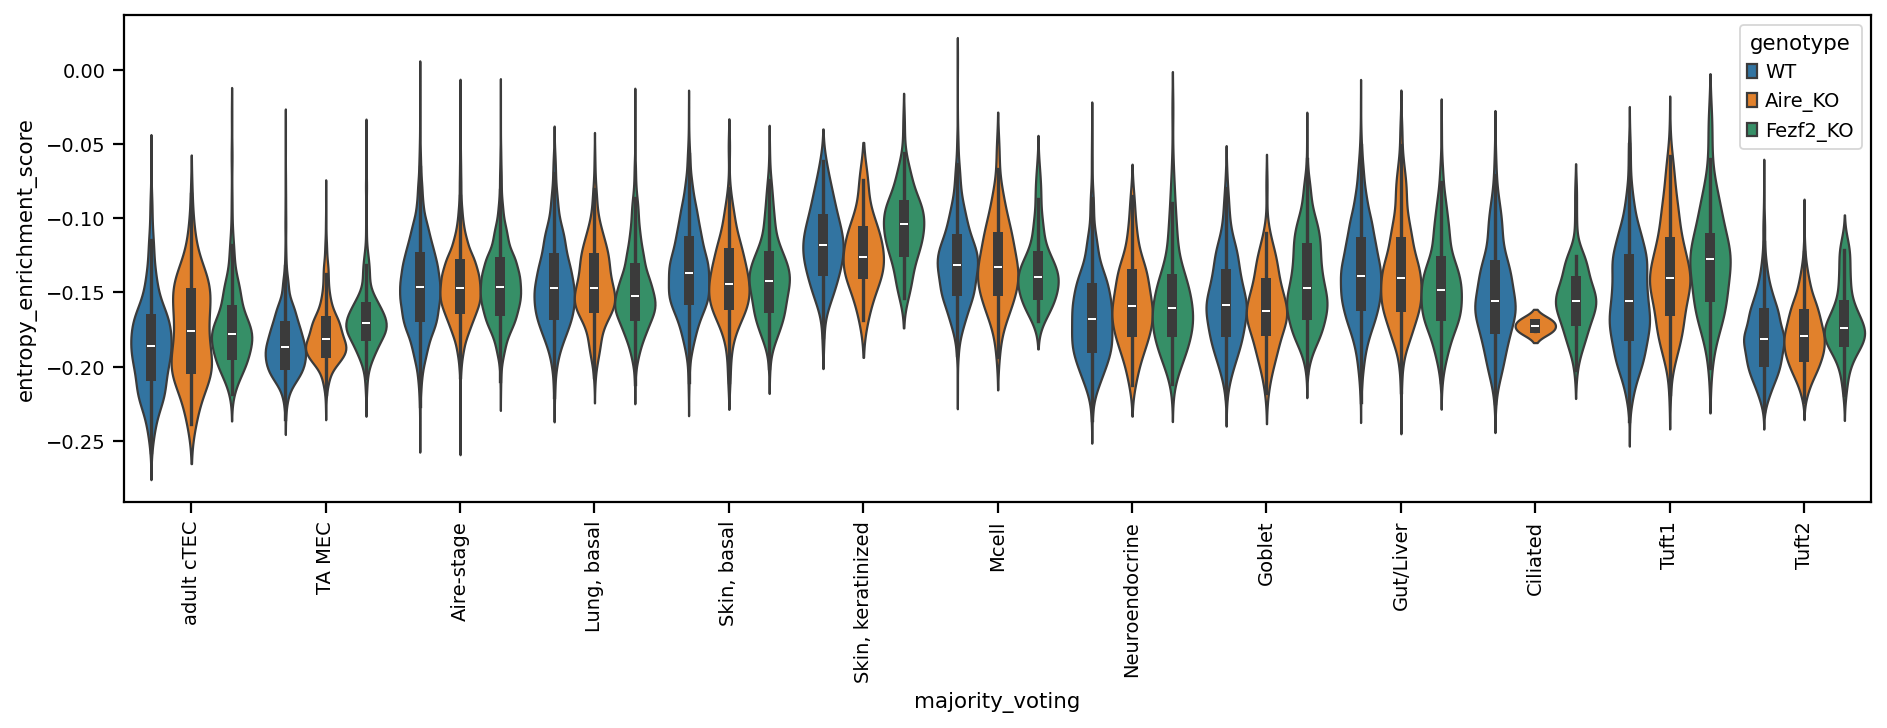

In [15]:
plt.figure(figsize=(14,4))
sns.violinplot(
    adata.obs,
    x="majority_voting",
    y="entropy_enrichment_score",
    hue="genotype",
    hue_order=["WT", "Aire_KO", "Fezf2_KO"],
    density_norm="width",
    width=0.9,
    order=["adult cTEC", "TA MEC", "Aire-stage", "Lung, basal",
           "Skin, basal", "Skin, keratinized", "Mcell", "Neuroendocrine", "Goblet",
           "Gut/Liver", "Ciliated", "Tuft1", "Tuft2"]
)
plt.xticks(rotation=90)
plt.show()

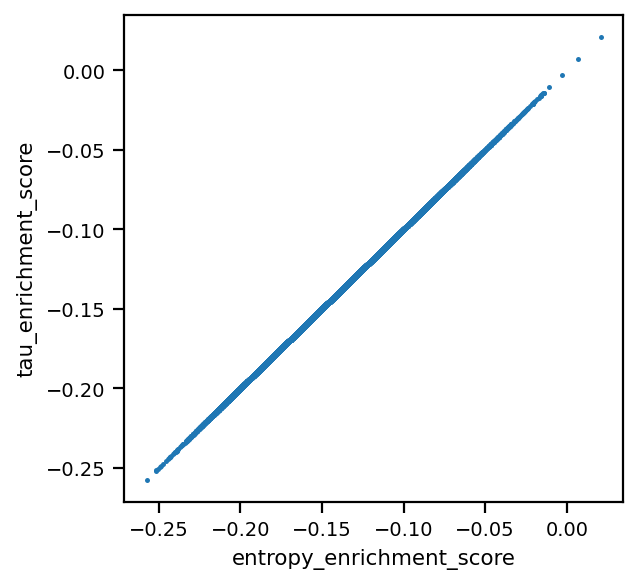

In [16]:
sns.scatterplot(
    adata.obs,
    x="entropy_enrichment_score",
    y="tau_enrichment_score",
    s=5,
    linewidth=0,
)
plt.show()

# Mean TRA score of expressed genes

## tau

In [17]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[tau_score.index]
exprs = exprs.mask(exprs < 1, 0)
exprs = exprs.mask(exprs >= 1, 1)
exprs = tau_score.cell_type_tau.values * np.array(exprs)
masked = np.ma.masked_equal(exprs, 0)
adata.obs["mean_expressed_tau_score"] = np.mean(masked, axis=1)

## entropy

In [18]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[entropy_score.index]
exprs = exprs.mask(exprs < 1, 0)
exprs = exprs.mask(exprs >= 1, 1)
exprs = entropy_score.entropy_score.values * np.array(exprs)
masked = np.ma.masked_equal(exprs, 0)
adata.obs["mean_expressed_entropy_score"] = np.mean(masked, axis=1)

## plots

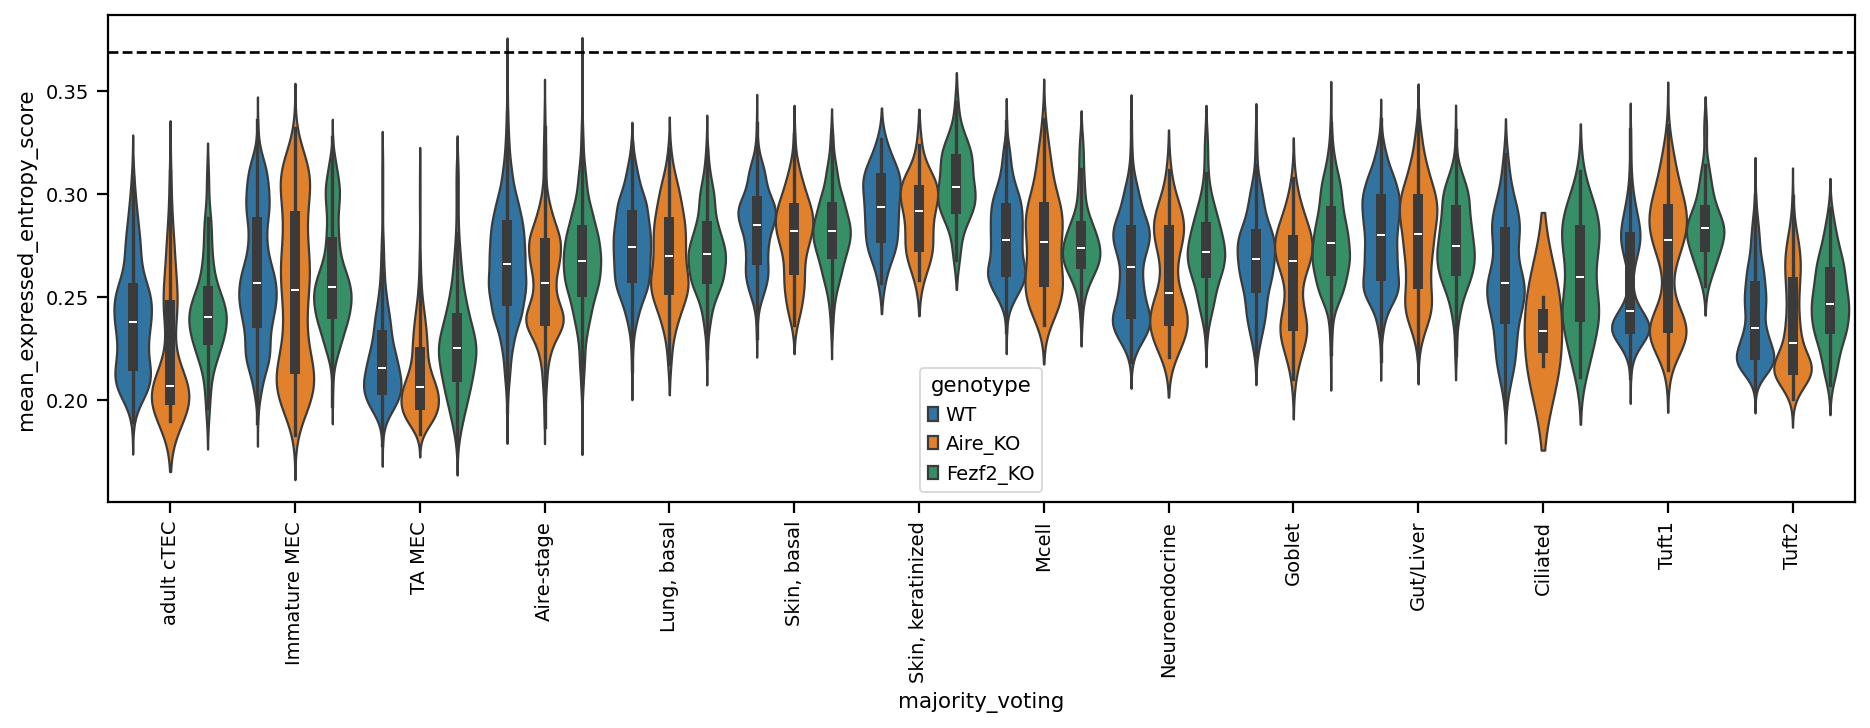

In [19]:
plt.figure(figsize=(14,4))
sns.violinplot(
    adata.obs,
    x="majority_voting",
    y="mean_expressed_entropy_score",
    hue="genotype",
    hue_order=["WT", "Aire_KO", "Fezf2_KO"],
    density_norm="width",
    width=0.9,
    order=["adult cTEC", "Immature MEC", "TA MEC", "Aire-stage", "Lung, basal",
           "Skin, basal", "Skin, keratinized", "Mcell", "Neuroendocrine", "Goblet",
           "Gut/Liver", "Ciliated", "Tuft1", "Tuft2"]
)
plt.xticks(rotation=90)
plt.axhline(y=entropy_score.entropy_score.mean(), color="black", linestyle="--")
plt.show()

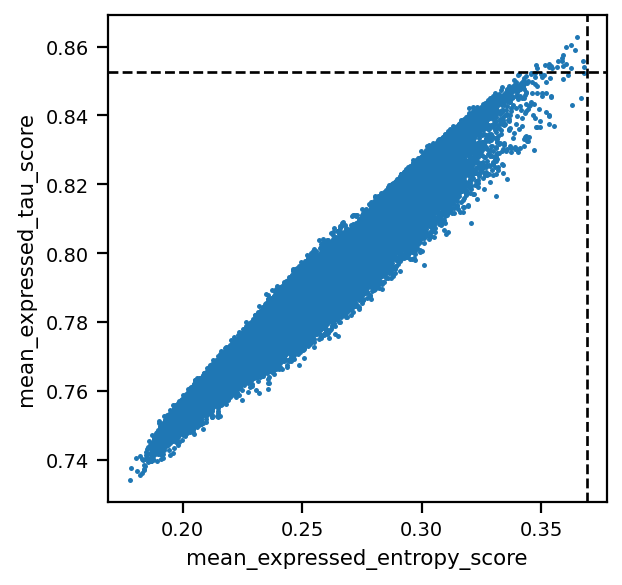

In [20]:
sns.scatterplot(
    adata.obs,
    x="mean_expressed_entropy_score",
    y="mean_expressed_tau_score",
    s=5,
    linewidth=0,
)
plt.axhline(y=tau_score.cell_type_tau.mean(), color="black", linestyle="--")
plt.axvline(x=entropy_score.entropy_score.mean(), color="black", linestyle="--")
plt.show()

# TRA fraction

## tau

In [21]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs > 0.1
TRAs = exprs[tau_score[tau_score.TRA].index].sum(axis=1)
adata.obs["TRA_fraction_tau"] = TRAs/exprs.sum(axis=1)

## entropy

In [22]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs > 0.1
TRAs = exprs[entropy_score[entropy_score.TRA].index].sum(axis=1)
nonTRAs = exprs[entropy_score[~entropy_score.TRA].index].sum(axis=1)
adata.obs["TRA_fraction_entropy"] = TRAs/exprs.sum(axis=1)

## plots

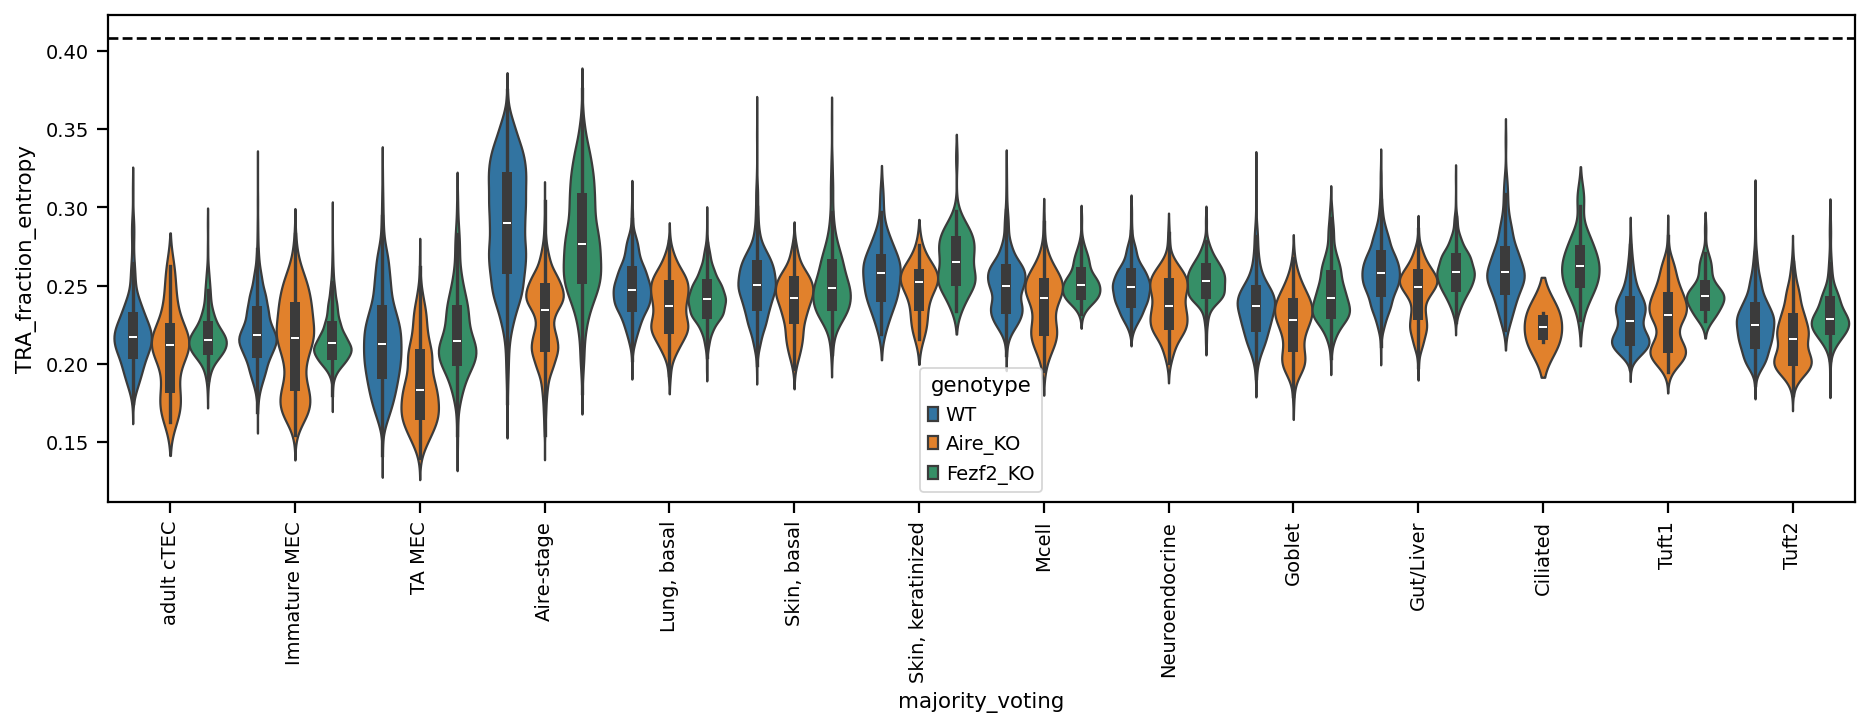

In [23]:
plt.figure(figsize=(14,4))
sns.violinplot(
    adata.obs,
    x="majority_voting",
    y="TRA_fraction_entropy",
    hue="genotype",
    hue_order=["WT", "Aire_KO", "Fezf2_KO"],
    density_norm="width",
    width=0.9,
    order=["adult cTEC", "Immature MEC", "TA MEC", "Aire-stage", "Lung, basal",
           "Skin, basal", "Skin, keratinized", "Mcell", "Neuroendocrine", "Goblet",
           "Gut/Liver", "Ciliated", "Tuft1", "Tuft2"]
)
plt.axhline(y=entropy_score.TRA.sum()/entropy_score.shape[0], color="black", linestyle="--")
plt.xticks(rotation=90)
plt.show()

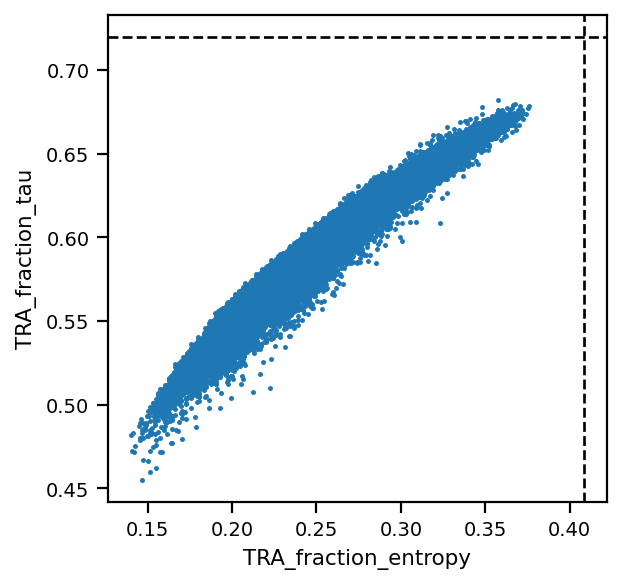

In [24]:
sns.scatterplot(
    adata.obs,
    x="TRA_fraction_entropy",
    y="TRA_fraction_tau",
    s=5,
    linewidth=0,
)
plt.axhline(y=tau_score.TRA.sum()/tau_score.shape[0], color="black", linestyle="--")
plt.axvline(x=entropy_score.TRA.sum()/entropy_score.shape[0], color="black", linestyle="--")
plt.show()

# Mean TRA score weighted expression

## tau

In [25]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[tau_score.index]
exprs = tau_score.cell_type_tau*exprs
# masked = np.ma.masked_equal(exprs, 0)
adata.obs["tau_weighted_expression"] = exprs.mean(axis=1)

## entropy

In [26]:
exprs = rna.tl.get_expression_matrix(adata, "scVI_normalized")
exprs = exprs[entropy_score.index]
exprs = entropy_score.entropy_score*exprs
# masked = np.ma.masked_equal(exprs, 0)
adata.obs["entropy_weighted_expression"] = exprs.mean(axis=1)

## plots

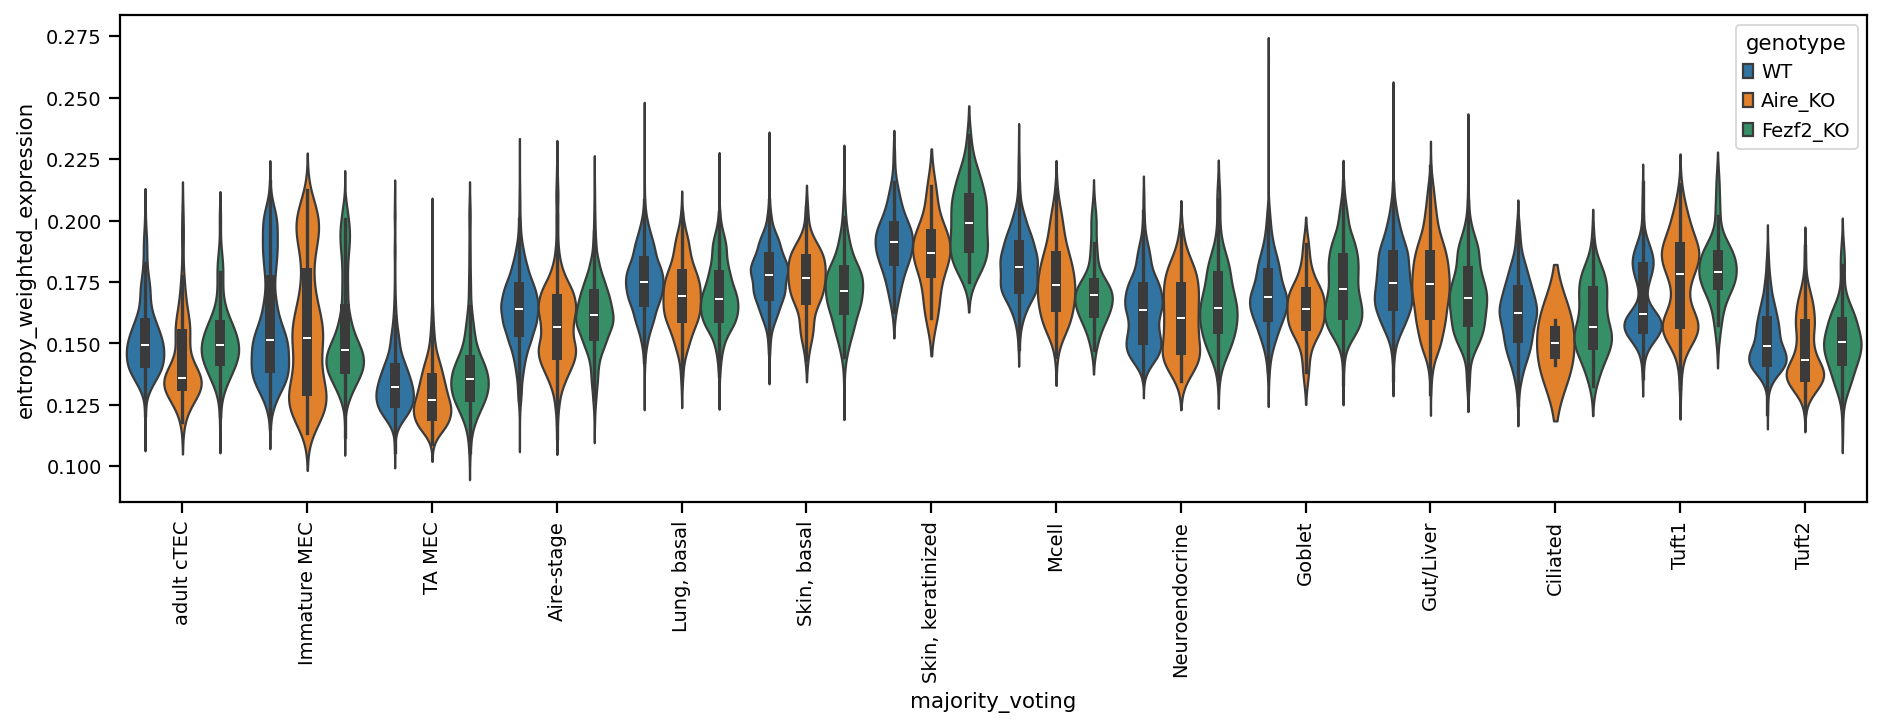

In [27]:
plt.figure(figsize=(14,4))
sns.violinplot(
    adata.obs,
    x="majority_voting",
    y="entropy_weighted_expression",
    hue="genotype",
    hue_order=["WT", "Aire_KO", "Fezf2_KO"],
    density_norm="width",
    width=0.9,
    order=["adult cTEC", "Immature MEC", "TA MEC", "Aire-stage", "Lung, basal",
           "Skin, basal", "Skin, keratinized", "Mcell", "Neuroendocrine", "Goblet",
           "Gut/Liver", "Ciliated", "Tuft1", "Tuft2"]
)
plt.xticks(rotation=90)
plt.show()

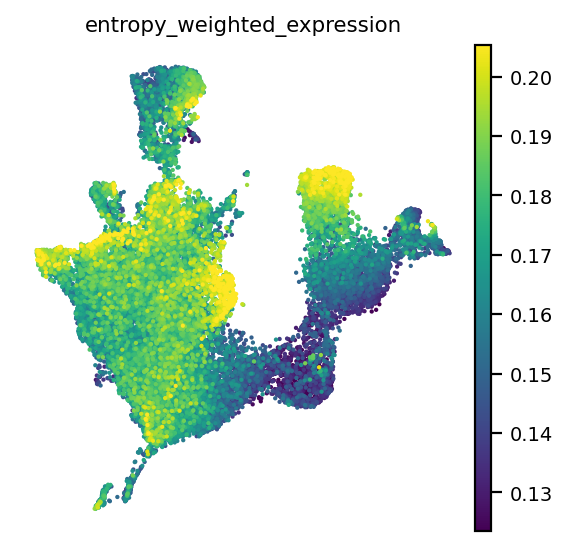

In [28]:
sc.pl.umap(
    adata[adata.obs.genotype == "WT"],
    color="entropy_weighted_expression",
    s=15,
    vmin=np.quantile(adata[adata.obs.genotype == "WT"].obs.entropy_weighted_expression, 0.01),
    vmax=np.quantile(adata[adata.obs.genotype == "WT"].obs.entropy_weighted_expression, 0.99)
)

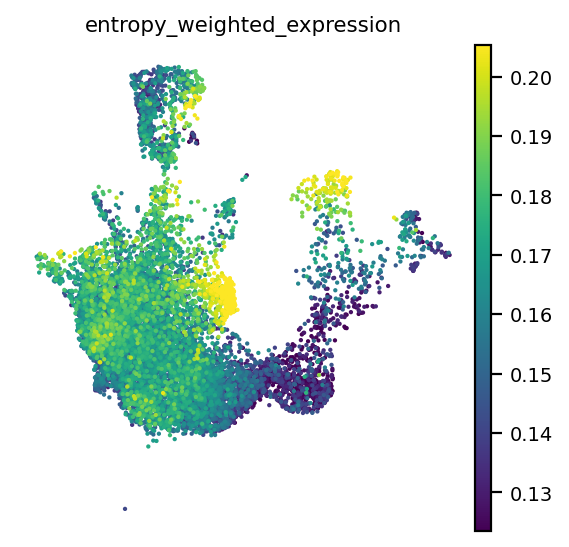

In [29]:
sc.pl.umap(
    adata[adata.obs.genotype == "Aire_KO"],
    color="entropy_weighted_expression",
    s=15,
    vmin=np.quantile(adata[adata.obs.genotype == "WT"].obs.entropy_weighted_expression, 0.01),
    vmax=np.quantile(adata[adata.obs.genotype == "WT"].obs.entropy_weighted_expression, 0.99)
)

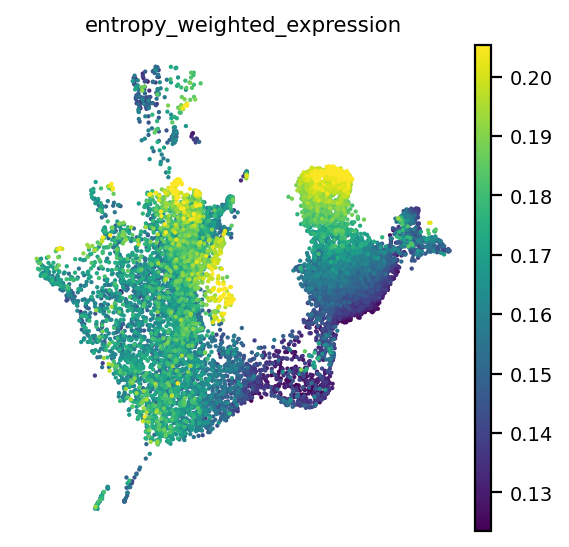

In [30]:
sc.pl.umap(
    adata[adata.obs.genotype == "Fezf2_KO"],
    color="entropy_weighted_expression",
    s=15,
    vmin=np.quantile(adata[adata.obs.genotype == "WT"].obs.entropy_weighted_expression, 0.01),
    vmax=np.quantile(adata[adata.obs.genotype == "WT"].obs.entropy_weighted_expression, 0.99)
)

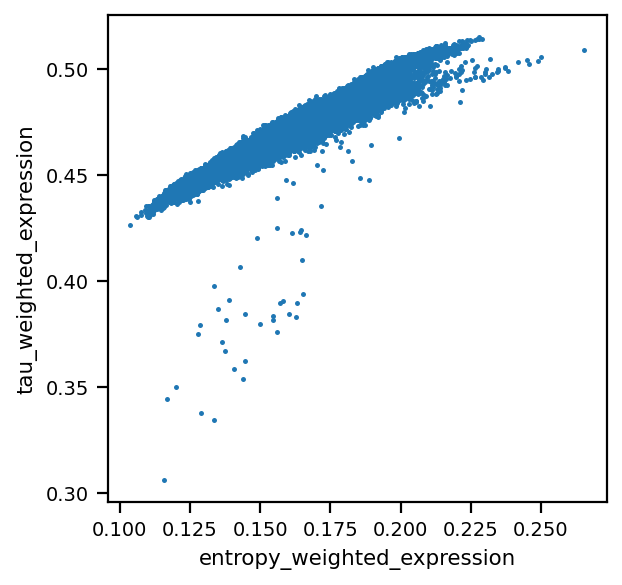

In [31]:
sns.scatterplot(
    adata.obs,
    x="entropy_weighted_expression",
    y="tau_weighted_expression",
    s=5,
    linewidth=0,
)
plt.show()